在之前的内容中，我们始终都是在使用numpy来实现神经网络。

然而，对于大型的神经网络模型而言，这样是非常耗时的。

幸运的是现在有很多成熟的深度学习框架可以给我们提供帮助，本文要讲解的就是Google推出的Tensorflow框架。

在使用Tensorflow框架时，通常的步骤如下：

1. 初始化变量

2. 启动一个Session

3. 训练算法

4. 完成神经网络



In [11]:
# Tensorflow库
# 首先，让我们先了解一些Tensorflow的库函数：

import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
 
%matplotlib inline
np.random.seed(1)

如果没有tensorflow包，那我们需要先安装tensorflow

安装方法：

打开终端：运行命令：`conda create -n tensorflow python=3.5` 

**注意** anaconda默认的python版本是3.6 这里我们创建3.5的版本的环境，因为tensorflow不支持3.6

之后会询问需要安装的依赖包，选择是y

你可能看到的如下：

```
[~] $ conda create -n tensorflow python=3.5
Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment /Users/yingang/anaconda3/envs/tensorflow:

The following NEW packages will be INSTALLED:

    ca-certificates: 2017.08.26-ha1e5d58_0
    certifi:         2017.7.27.1-py36hd973bb6_0
    libcxx:          4.0.1-h579ed51_0
    libcxxabi:       4.0.1-hebd6815_0
    libedit:         3.1-hb4e282d_0
    libffi:          3.2.1-h475c297_4
    ncurses:         6.0-hd04f020_2
    openssl:         1.0.2m-h86d3e6a_1
    pip:             9.0.1-py36h1555ced_4
    python:          3.6.3-h5ce8c04_4
    readline:        7.0-hc1231fa_4
    setuptools:      36.5.0-py36h2134326_0
    sqlite:          3.20.1-h7e4c145_2
    tk:              8.6.7-h35a86e2_3
    wheel:           0.29.0-py36h3597b6d_1
    xz:              5.2.3-h0278029_2
    zlib:            1.2.11-hf3cbc9b_2

Proceed ([y]/n)? y

ca-certificate 100% |################################| Time: 0:00:00 374.74 kB/s
libcxxabi-4.0. 100% |################################| Time: 0:00:00   3.61 MB/s
tk-8.6.7-h35a8 100% |################################| Time: 0:00:02   1.36 MB/s
xz-5.2.3-h0278 100% |################################| Time: 0:00:00 687.46 kB/s
zlib-1.2.11-hf 100% |################################| Time: 0:00:00 378.03 kB/s
libcxx-4.0.1-h 100% |################################| Time: 0:00:02 378.96 kB/s
openssl-1.0.2m 100% |################################| Time: 0:00:49  72.64 kB/s
libffi-3.2.1-h 100% |################################| Time: 0:00:00  72.16 kB/s
ncurses-6.0-hd 100% |################################| Time: 0:00:14  59.32 kB/s
libedit-3.1-hb 100% |################################| Time: 0:00:01  89.42 kB/s
readline-7.0-h 100% |################################| Time: 0:00:03 107.25 kB/s
sqlite-3.20.1- 100% |################################| Time: 0:00:18 104.49 kB/s
python-3.6.3-h 100% |################################| Time: 0:07:11  36.84 kB/s
certifi-2017.7 100% |################################| Time: 0:00:00 336.41 kB/s
setuptools-36. 100% |################################| Time: 0:00:00   1.16 MB/s
wheel-0.29.0-p 100% |################################| Time: 0:00:00   1.21 MB/s
pip-9.0.1-py36 100% |################################| Time: 0:00:01   1.23 MB/s
#
# To activate this environment, use:
# > source activate tensorflow
#
# To deactivate an active environment, use:
# > source deactivate
#
```

然后使用 

```
[~] $ pip install tensorflow
```

安装tensorflow框架

In [34]:
# 定义我们要用到的函数，包括了不实用tensorflow的前向传播 反向传播等函数

def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
 
    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
 
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
 
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))
 
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches
 
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y
 
def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [12288, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

现在，我们已经引入了我们需要的库函数。

接下来，我们首先来计算一下训练样本的误差：

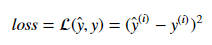

In [13]:
y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
y = tf.constant(39, name='y')                    # Define y. Set to 39
 
loss = tf.Variable((y - y_hat)**2, name='loss')  # Create a variable for the loss
 
init = tf.global_variables_initializer()         # When init is run later (session.run(init)),
                                                 # the loss variable will be initialized and ready to be computed
with tf.Session() as session:                    # Create a session and print the output
    session.run(init)                            # Initializes the variables
    print(session.run(loss))                     # Prints the loss
    # 9

9


对于Tensorflow的代码实现而言，实现代码的结构如下：

1. 创建Tensorflow变量（此时，尚未直接计算）

2. 实现Tensorflow变量之间的操作定义

3. 初始化Tensorflow变量

4. 创建Session

5. 运行Session，此时，之前编写操作都会在这一步运行。



下面，让我们通过更多的示例来了解这个概念：

In [14]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c) 
# Tensor("Mul:0", shape=(), dtype=int32)

Tensor("Mul:0", shape=(), dtype=int32)


正如我们之前所讲的，在定义变量的部分，计算不会直接进行，因此，c并不是20，而是一个int32型变量。

In [15]:
sess = tf.Session()
print(sess.run(c))
# 20

20


接下来，我们来继续学习placeholder。

placeholder是一个占位变量，表示在运行过程中才会给这个变量赋值。

In [16]:
x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x: 3}))
# 6
sess.close()

6


### 线性函数

接下来，我们需要用Tensorflow来实现神经网络中最常用的函数之一：线性函数。



In [18]:
def linear_function():
    """
    Implements a linear function: 
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- runs the session for Y = WX + b 
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (4 lines of code)
    X = tf.constant(np.random.randn(3,1), name = "X")
    W = tf.constant(np.random.randn(4,3), name = "X")
    b = tf.constant(np.random.randn(4,1), name = "X")
    Y = tf.matmul(W, X) + b
    ### END CODE HERE ### 
    
    # Create the session using tf.Session() and run it with sess.run(...) on the variable you want to calculate
    
    ### START CODE HERE ###
    sess = tf.Session()
    result = sess.run(Y)
    ### END CODE HERE ### 
    
    # close the session 
    sess.close()
 
    return result

linear_function()


array([[-2.15657382],
       [ 2.95891446],
       [-1.08926781],
       [-0.84538042]])

### sigmod函数

In [19]:
def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """
    
    ### START CODE HERE ### ( approx. 4 lines of code)
    # Create a placeholder for x. Name it 'x'.
    x = tf.placeholder(tf.float32, name = "x")
 
    # compute sigmoid(x)
    sigmoid = tf.sigmoid(x)
 
    # Create a session, and run it. Please use the method 2 explained above. 
    # You should use a feed_dict to pass z's value to x. 
    with tf.Session() as sess:
        # Run session and call the output "result"
        result = sess.run(sigmoid, feed_dict = {x: z})
    
    ### END CODE HERE ###
    
    return result

### 代价函数计算

其中，代价函数的定义如下：

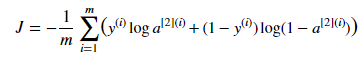

In [20]:
def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Note: What we've been calling "z" and "y" in this class are respectively called "logits" and "labels" 
    in the TensorFlow documentation. So logits will feed into z, and labels into y. 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    
    ### START CODE HERE ### 
    
    # Create the placeholders for "logits" (z) and "labels" (y) (approx. 2 lines)
    z = tf.placeholder(tf.float32, name = "logits")
    y = tf.placeholder(tf.float32, name = "labels")
    
    # Use the loss function (approx. 1 line)
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = z,  labels = y)
    
    # Create a session (approx. 1 line). See method 1 above.
    sess = tf.Session()
    
    # Run the session (approx. 1 line).
    cost = sess.run(cost, feed_dict = {z: logits, y:labels})
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()    
    ### END CODE HERE ###
    
    return cost

看到了嘛？

只用一个函数`tf.nn.sigmoid_cross_entropy_with_logits(logits = z,  labels = y)`，我们就实现了如此复杂的代价函数。

这就是深度学习框架的魅力！

### 进行0,1编码

通常，对于一个多分类问题，我们得到的标签是一些0到C-1的整数。其中，C是分类数。

然而，在训练之前，我们需要将直接0到C-1的整数转换为一个C维的向量。

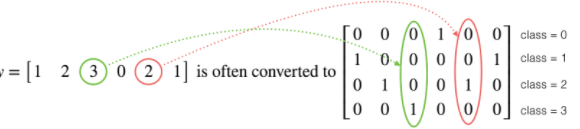

In [21]:
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    ### START CODE HERE ###
    
    # Create a tf.constant equal to C (depth), name it 'C'. (approx. 1 line)
    C = tf.constant(C, name = "C")
    
    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot_matrix = tf.one_hot(labels, C, 1)
    
    # Create the session (approx. 1 line)
    sess = tf.Session()
    
    # Run the session (approx. 1 line)
    one_hot = sess.run(one_hot_matrix).T
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    ### END CODE HERE ###
    
    return one_hot

### 全0初始化与全1初始化

In [22]:
def zeros(shape):
    """
    Creates an array of ones of dimension shape
    
    Arguments:
    shape -- shape of the array you want to create
        
    Returns: 
    ones -- array containing only ones
    """
    
    ### START CODE HERE ###
    
    # Create "zeros" tensor using tf.zeros(...). (approx. 1 line)
    ones = tf.zeros(shape)
    
    # Create the session (approx. 1 line)
    sess = tf.Session()
    
    # Run the session to compute 'zeros' (approx. 1 line)
    zeros = sess.run(zeros)
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    ### END CODE HERE ###
    return zeros
 
def ones(shape):
    """
    Creates an array of ones of dimension shape
    
    Arguments:
    shape -- shape of the array you want to create
        
    Returns: 
    ones -- array containing only ones
    """
    
    ### START CODE HERE ###
    
    # Create "ones" tensor using tf.ones(...). (approx. 1 line)
    ones = tf.ones(shape)
    
    # Create the session (approx. 1 line)
    sess = tf.Session()
    
    # Run the session to compute 'ones' (approx. 1 line)
    ones = sess.run(ones)
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    ### END CODE HERE ###
    return ones

### 用Tensorflow搭建一个神经网络模型

用tensorflow搭建神经网络模型时，可以分为两大步骤：

1. 建立计算图

2. 训练运行

问题描述：

我们需要去建立一个神经网络来识别0-5的六个手势。

每张图片的大小都是64*64像素。其中，训练集包含1080张图片。测试集包含120张图片。

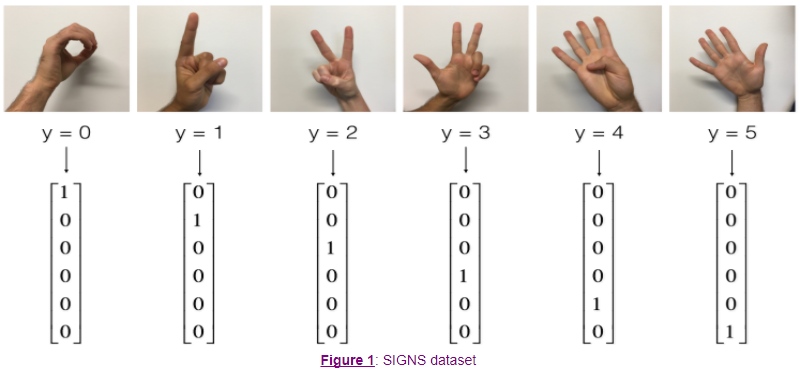

In [24]:
# 读取数据集
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 5


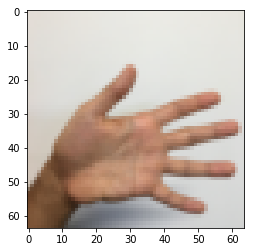

In [25]:
# 测试一张图片吧

# Example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

接下来，我们需要对读取的数据集进行预处理：

包括归一化和之前提到的零一化。

In [26]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

我们需要建立的模型结构如下：



其中，Softmax层是在多分类问题中最常用的输出层。

接下来，我们需要创建一些placeholder：

In [27]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """
 
    ### START CODE HERE ### (approx. 2 lines)
    X = tf.placeholder(tf.float32, [n_x, None], name = "X")
    Y = tf.placeholder(tf.float32, [n_y, None], name = "Y")
    ### END CODE HERE ###
    
    return X, Y

接下来，我们需要进行参数初始化：

In [28]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())
    ### END CODE HERE ###
 
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

然后，我们需要实现前向传播计算：

In [29]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters
 
    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.matmul(W1, X) + b1                                           # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
    Z2 = tf.matmul(W2, A1) + b2                               # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.matmul(W3, A2) + b3                            # Z3 = np.dot(W3,Z2) + b3
    ### END CODE HERE ###
    
    return Z3

最后，我们需要计算代价函数：

In [30]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    ### END CODE HERE ###
    
    return cost


需要说明的是，对于反向传播计算和参数更新这两个步骤，在Tensorflow等框架中，已经自动的根据我们编写的前向传播计算和代价函数自动完成了，无需我们自己编写。

下面，让我们根据刚才实现的一些方法来构建我们的模型吧：

In [31]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_x, n_y)
    ### END CODE HERE ###
 
    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()
 
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):
 
            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
 
            for minibatch in minibatches:
 
                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                epoch_cost += minibatch_cost / num_minibatches
 
            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
 
        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")
 
        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
 
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
 
        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Cost after epoch 0: 1.855702
Cost after epoch 100: 1.016458
Cost after epoch 200: 0.733102
Cost after epoch 300: 0.572915
Cost after epoch 400: 0.468685
Cost after epoch 500: 0.381068
Cost after epoch 600: 0.313809
Cost after epoch 700: 0.254146
Cost after epoch 800: 0.203801
Cost after epoch 900: 0.166393
Cost after epoch 1000: 0.141141
Cost after epoch 1100: 0.107718
Cost after epoch 1200: 0.086261
Cost after epoch 1300: 0.060924
Cost after epoch 1400: 0.050927


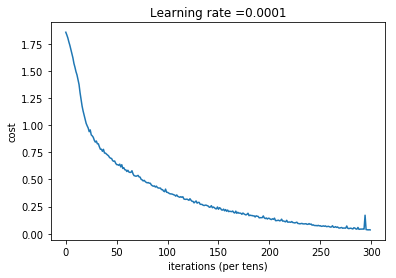

Parameters have been trained!
Train Accuracy: 0.999074
Test Accuracy: 0.725


In [32]:
# 用我们的模型来测试一下吧：

parameters = model(X_train, Y_train, X_test, Y_test)

可以看到，经过一段时间的训练后，训练集的精确度为99.9%。而测试集的精确度为71.7%。

出现了一定的过拟合！想想应该怎么处理呢？

### 用一些其他图片来测试一下吧

除了一些训练集和测试集中的图片，我们还可以使用一些其他的图片来进行测试。

Your algorithm predicts: y = 3


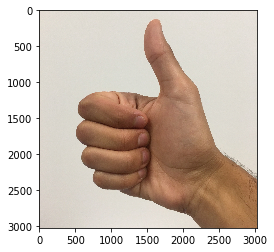

In [35]:
import scipy
from PIL import Image
from scipy import ndimage
 
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "thumbs_up.jpg"
## END CODE HERE ##
 
# We preprocess your image to fit your algorithm.
fname = "test_image/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parameters)
 
plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))